# Chaper 16: Solving Real-World Problems with Machine Learning




New Skills in This Chapter:

• Converting a real-world problem into a game

• Solving a real-world problem using machine learning

• Creating and using a multi-dimensional Q-table

• Finding out all possible permutations of a given list

***
*The most obvious characteristic of science is its application, the fact that as a consequence of science one has a power to do things. And the effect this power has had need hardly be mentioned. The whole industrial revolution would almost have been impossible without the development of science.*
***
-- Richard P. Feynman

***

In [1]:
import os

os.makedirs("files/ch16", exist_ok=True)

# 16.1. Create A Game Environment for the Delivery Route

## 16.1.1. Draw Delivery Routes

In [2]:
from utils.ch16util import delivery_map

delivery_map()

# 16.1.3 Use the Delivery Route Game Environment


In [3]:
import numpy as np
import random, time
from utils.ch16util import Route

env=Route((5, 6), (1, 3)) 
state=env.reset() 
env.render()
max_steps=20
# Try a maximum of 20 steps
for step in range(1,max_steps+1):
    # Select a random action
    action=random.choice(env.action_space)
    # Use the selected action to make the move
    new_state,reward,done,info=env.step(action)
    env.render()
    if done or step==max_steps:
        break
    else:
        state = new_state
time.sleep(5)    
env.close()

# 16.2. Train A Q-Table between Any Two Positions

## 16.2.1 Create and Trian A Q table


In [4]:
def update_Q(episode):
    state=env.reset()     
    # define epsilon to determine eploration/exploitation
    epsilon=min_exp+(max_exp-min_exp)*episode/episodes
    # Play a full game till it ends
    for _ in range(max_steps):
        # Select the best action or the random action
        if epsilon>np.random.uniform(0,1,1):
            action=np.argmax(Q[state,:])
        else:
            action=random.choice(env.action_space)
        # Use the selected action to make the move
        new_state,reward,done,info=env.step(action)
        # Update Q values
        if done==True:
            Q[state,action]=reward
            break    
        else:
            Q[state,action]=lr*(reward+gamma*np.max\
             (Q[new_state,:]))+(1-lr)*Q[state,action]
            state=new_state    

In [5]:
import pickle

# Set up hyperparameters
lr=0.6
gamma=0.9
max_exp=0.7
min_exp=0.0
max_steps=1000
episodes=500

# Train the Q-table
Q=np.zeros((91, 4))
env=Route((3,9),(5,0))
for episode in range(episodes):
    update_Q(episode)
    
# Save the Q-table and print it out  
with open('files/ch16/Qs.pickle', 'wb') as fp:
    pickle.dump(Q,fp)
Q=np.round(Q,4)
print(Q) 

[[ 54.9539  54.9539  62.171   48.4585]
 [ 48.4585  54.9539  54.9539  42.6127]
 [ 42.6127  48.4585  48.4585  37.3514]
 [ 37.3514  42.6127  42.6127  32.6163]
 [ 32.6163  37.3514  37.3514  28.3546]
 [ 28.3546  32.6163  32.6163  24.5192]
 [ 24.5192  28.3546  28.3546  21.0672]
 [ 21.0672  24.5192  24.5192  17.9605]
 [ 17.9605  21.0672  21.0672  15.1645]
 [ 15.1645  17.9605  17.9605  15.1645]
 [ 54.9539  62.171   70.19    54.9539]
 [ 48.4585  62.171   62.171   48.4585]
 [ 42.6127  54.9539  54.9539  42.6127]
 [ 37.3514  48.4585  48.4585  37.3514]
 [ 32.6163  42.6127  42.6127  32.6163]
 [ 28.3546  37.3514  37.3514  28.3546]
 [ 24.5192  32.6163  32.6163  24.5192]
 [ 21.0672  28.3546  28.3546  21.0672]
 [ 17.9605  24.5192  24.5192  17.9605]
 [ 15.1645  21.0672  21.0672  17.9605]
 [ 62.171   70.19    79.1     62.171 ]
 [ 54.9539  70.19    70.19    54.9539]
 [ 48.4585  62.171   62.171   48.4585]
 [ 42.6127  54.9539  48.4585  42.6127]
 [ 37.3514  48.4585  42.6127  37.3514]
 [ 32.6163  42.6127  37.3



When training the Q-table, we set the cutoff value to min_exp=0.3 in the first episode of training. If a randomly distributed variable between 0 and 1 is greater than this cutoff value, the agent uses exploration; Otherwise, the agent uses exploitation. This means with 30% probability, the agent chooses actions based on values in the Q-table; with the complementary probability of 70%, the agent randomly selects moves to explore different strategies. The cutoff value then gradually increases as training progresses. At the last episode of training, the cutoff value increases to max_exp=0.7.

After 10,000 episodes of training, we print out the trained Q-table. You'll notice that the Q-values are exactly the same as those in the file Qtable.csv that we used earlier. This answers our earlier question of where did the Q-values come from. You can play the Frozen Lake game using the newly trained Q-table trained_Q.csv. You should get exactly the same outcome as earlier when you use the file Qtable.csv. I'll leave that as an exercise for you. 

The trained Q-table is a 91 by 4 numpy array, saved as Qs.pickle in your chapter folder. Next, you’ll use this trained Q table to see if the agent can successfully reach the goal in our own custom environment.

## 16.2.2. Test the Trained Tabular Q-Values


In [6]:
env=Route((3,9),(5,0))
env.render()
for _ in range(max_steps):
    action = np.argmax(Q[state,:])
    # Use the selected action to make the move
    new_state, reward, done, info = env.step(action)
    state = new_state
    env.render()
    if done==True:
        break
env.close()

# 16.3. Train the Q-Table for All Possible Routes


## 16.3.1. Train the Large Q-Table


In [7]:
def calculate_Q(start,end):
    env = Route(start,end)
    for episode in range(episodes):
        state=env.reset()  
        epsilon=min_exp+(max_exp-min_exp)*episode/episodes
        # Play a full game till it ends
        for _ in range(max_steps):
            # Select the best action or the random action
            if np.random.uniform(0,1,1)<epsilon:
                action=np.argmax(Q[start[0],start[1],\
                                   end[0],end[1],state,:])
            else:
                action=random.choice(env.action_space)
            # Use the selected action to make the move
            new_state,reward,done,info=env.step(action)
            # Update Q values
            if done==True:
                Q[start[0],start[1],end[0],end[1],state,\
                  action] = reward
                break    
            else:
                Q[start[0],start[1],end[0],end[1],state,action]=\
                    lr*(reward+gamma*np.max\
            (Q[start[0],start[1],end[0],end[1],new_state,:]))\
    +(1-lr)*Q[start[0],start[1],end[0],end[1],state, action]
                state=new_state   

Next, we create a new Q-table, which has a dimension of (10,10,10,10,91,4), as follows:

In [8]:
Q=np.zeros((10, 10, 10, 10, 91, 4))

In [9]:
park=[(3, 3), (3, 4), (3, 5), 
           (4, 3), (4, 4), (4, 5), 
           (5, 3), (5, 4), (5, 5)]
grid=[]
for x in range(10):
    for y in range(10):
        if (x,y) not in park:
            grid.append((x,y))

In [10]:
for start in grid:
    for end in grid:
        if end!=start:
            calculate_Q(start, end)
            print(f"finished start {start} end {end}")      
with open('files/ch16/allQs.pickle', 'wb') as fp:
    pickle.dump(Q,fp)

## 16.3.2. Test the Large Q-Table


In [11]:
with open('files/ch16/allQs.pickle', 'rb') as fp:
    Q=pickle.load(fp)

start=(8,9)
end=(3,1)
env=Route(start,end) 
state=env.reset() 
env.render()
while True:
    # Select the action with the highest Q
    action=np.argmax(Q[start[0],start[1],end[0],\
                       end[1],state,:])
    # Use the selected action to make the move
    new_state, reward, done, _ = env.step(action)
    env.render()
    state=new_state
    if done==True:
        break
env.close()

# 16.4. The Shortest Delivery Route to Eight Households
Now that you have the solution to the shortest route between any two points on the grid, you’ll use brute force to find the shortest route to deliver to 8 households each day. 
You’ll first learn how to find out all possible combinations from 8 households. You’ll calculate the total length of each possibility, select the route with the shortest length, and that’s your delivery route of the day. 

## 16.4.1. Find All Possible Combinations in Python


In [12]:
from itertools import permutations

# Get all combination of [0, 1, 2, 3, 4]
perms=permutations(range(5), 4)
total=0 
for i in perms:
    print(i)
    total+=1
print(total)

(0, 1, 2, 3)
(0, 1, 2, 4)
(0, 1, 3, 2)
(0, 1, 3, 4)
(0, 1, 4, 2)
(0, 1, 4, 3)
(0, 2, 1, 3)
(0, 2, 1, 4)
(0, 2, 3, 1)
(0, 2, 3, 4)
(0, 2, 4, 1)
(0, 2, 4, 3)
(0, 3, 1, 2)
(0, 3, 1, 4)
(0, 3, 2, 1)
(0, 3, 2, 4)
(0, 3, 4, 1)
(0, 3, 4, 2)
(0, 4, 1, 2)
(0, 4, 1, 3)
(0, 4, 2, 1)
(0, 4, 2, 3)
(0, 4, 3, 1)
(0, 4, 3, 2)
(1, 0, 2, 3)
(1, 0, 2, 4)
(1, 0, 3, 2)
(1, 0, 3, 4)
(1, 0, 4, 2)
(1, 0, 4, 3)
(1, 2, 0, 3)
(1, 2, 0, 4)
(1, 2, 3, 0)
(1, 2, 3, 4)
(1, 2, 4, 0)
(1, 2, 4, 3)
(1, 3, 0, 2)
(1, 3, 0, 4)
(1, 3, 2, 0)
(1, 3, 2, 4)
(1, 3, 4, 0)
(1, 3, 4, 2)
(1, 4, 0, 2)
(1, 4, 0, 3)
(1, 4, 2, 0)
(1, 4, 2, 3)
(1, 4, 3, 0)
(1, 4, 3, 2)
(2, 0, 1, 3)
(2, 0, 1, 4)
(2, 0, 3, 1)
(2, 0, 3, 4)
(2, 0, 4, 1)
(2, 0, 4, 3)
(2, 1, 0, 3)
(2, 1, 0, 4)
(2, 1, 3, 0)
(2, 1, 3, 4)
(2, 1, 4, 0)
(2, 1, 4, 3)
(2, 3, 0, 1)
(2, 3, 0, 4)
(2, 3, 1, 0)
(2, 3, 1, 4)
(2, 3, 4, 0)
(2, 3, 4, 1)
(2, 4, 0, 1)
(2, 4, 0, 3)
(2, 4, 1, 0)
(2, 4, 1, 3)
(2, 4, 3, 0)
(2, 4, 3, 1)
(3, 0, 1, 2)
(3, 0, 1, 4)
(3, 0, 2, 1)
(3, 0, 2, 4)
(3, 0, 4, 1)

## 16.4.2. Total Distance to Deliver to Eight Households


In [13]:
# Calculate the distance between any two points
def cal_dis(start, end):
    env=Route(start, end)
    route=[]
    state=env.reset()      
    # Go from start to end until you reach the end point
    for _ in range(max_steps):
        route.append(env.grid[state])
        action=np.argmax(Q[start[0],start[1],end[0],\
                           end[1],state,:])
        new_state,reward,done,info=env.step(action)
        state=new_state
        if done==True:
            return len(route), route
            break 

In [14]:
while True:
    # Randomy pick 8 households
    indexes=np.random.choice(range(len(grid)),size=8)
    households=[grid[i] for i in indexes]
    # Make sure the hub is not selected
    if (6,6) not in households:
        break
# Print out the coordinates of the 8 households
print("the indexes of the 8 households are\n",indexes)
print("the coordinates of the 8 households are\n",households)
# Add H=(6,6) as the first stop and last stop
destinations = [(6,6)] + households + [(6,6)]
print("the coordinates of the 10 destinations are\n",destinations)

the indexes of the 8 households are
 [65 50 86 16 74 67 83 58]
the coordinates of the 8 households are
 [(7, 4), (5, 9), (9, 5), (1, 6), (8, 3), (7, 6), (9, 2), (6, 7)]
the coordinates of the 10 destinations are
 [(6, 6), (7, 4), (5, 9), (9, 5), (1, 6), (8, 3), (7, 6), (9, 2), (6, 7), (6, 6)]


In [15]:
# Calculate the total distance
def total_dis(destinations):
    totaldis=0
    routes=[]
    for i in range(len(destinations)-1):
        dis,route=cal_dis(destinations[i],\
                            destinations[i+1])
        totaldis+=dis
        routes.append(route)
    return totaldis,routes
totaldis,routes=total_dis(destinations)  
print("# of blocks the agent needs to travel is",\
     totaldis)
print("destinations the agent needs to travel to is",\
     routes)

# of blocks the agent needs to travel is 56
destinations the agent needs to travel to is [[(6, 6), (6, 5), (6, 4)], [(7, 4), (6, 4), (6, 5), (6, 6), (5, 6), (5, 7), (5, 8)], [(5, 9), (5, 8), (5, 7), (5, 6), (6, 6), (6, 5), (7, 5), (8, 5)], [(9, 5), (8, 5), (7, 5), (6, 5), (6, 6), (5, 6), (4, 6), (3, 6), (2, 6)], [(1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (6, 5), (6, 4), (6, 3), (7, 3)], [(8, 3), (7, 3), (7, 4), (7, 5)], [(7, 6), (7, 5), (7, 4), (7, 3), (7, 2), (8, 2)], [(9, 2), (8, 2), (7, 2), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)], [(6, 7)]]


## 16.4.3. The Shortest Route


In [16]:
perms=permutations(households, 8)

In [17]:
destination_perms=[]
for perm in perms:
    destinations=[(6,6)]+list(perm)+[(6,6)]
    destination_perms.append(destinations)

In [18]:
dislist=[]
routeslist=[]
for d in destination_perms:
    dis,routes=total_dis(d)
    dislist.append(dis)
    routeslist.append(routes)

In [19]:
shortest_idx=np.argmin(np.array(dislist)) 
min_blocks=dislist[shortest_idx] 
shortest_perm=destination_perms[shortest_idx] 
shortest_route=routeslist[shortest_idx] 
print("the minimum number of blocks to travel is",\
      min_blocks)
print("the destinations along the shortest route is")
print(shortest_perm)
print("the shortest route to travel for today is")
print(shortest_route)

the minimum number of blocks to travel is 30
the destinations along the shortest route is
[(6, 6), (7, 4), (8, 3), (9, 2), (9, 5), (7, 6), (1, 6), (5, 9), (6, 7), (6, 6)]
the shortest route to travel for today is
[[(6, 6), (6, 5), (6, 4)], [(7, 4), (7, 3)], [(8, 3), (8, 2)], [(9, 2), (9, 3), (9, 4)], [(9, 5), (8, 5), (7, 5)], [(7, 6), (6, 6), (5, 6), (4, 6), (3, 6), (2, 6)], [(1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (5, 7), (5, 8)], [(5, 9), (5, 8), (5, 7)], [(6, 7)]]


# 16. 5. Animate the Delivery Route


## 16.5.1. Create A Graph at Each Stop

In [20]:
from utils.ch16util import gen_ps

gen_ps(perm,shortest_perm,shortest_route)

## 16.5.2. Animate the Shortest Route


In [21]:
from PIL import Image
import imageio
min_blocks=38
frames=[]
for i in range(min_blocks+1):
    file=f"files/ch16/route{i}.ps"
    im=Image.open(file)
    frame=np.asarray(im)
    frames.append(frame)
imageio.mimsave('files/ch16/route.gif',frames,fps=2)

<img src="https://gattonweb.uky.edu/faculty/lium/ml/route.gif" />

## 16.5.3. Subplots of the Eight Deliveries
We combine the 39 iamges into an animation...

In [22]:
subplots=[]
for i in range(8):
    file=f"files/ch16/s{i}.ps"
    im=Image.open(file)
    frame=np.asarray(im)
    subplots.append(frame)

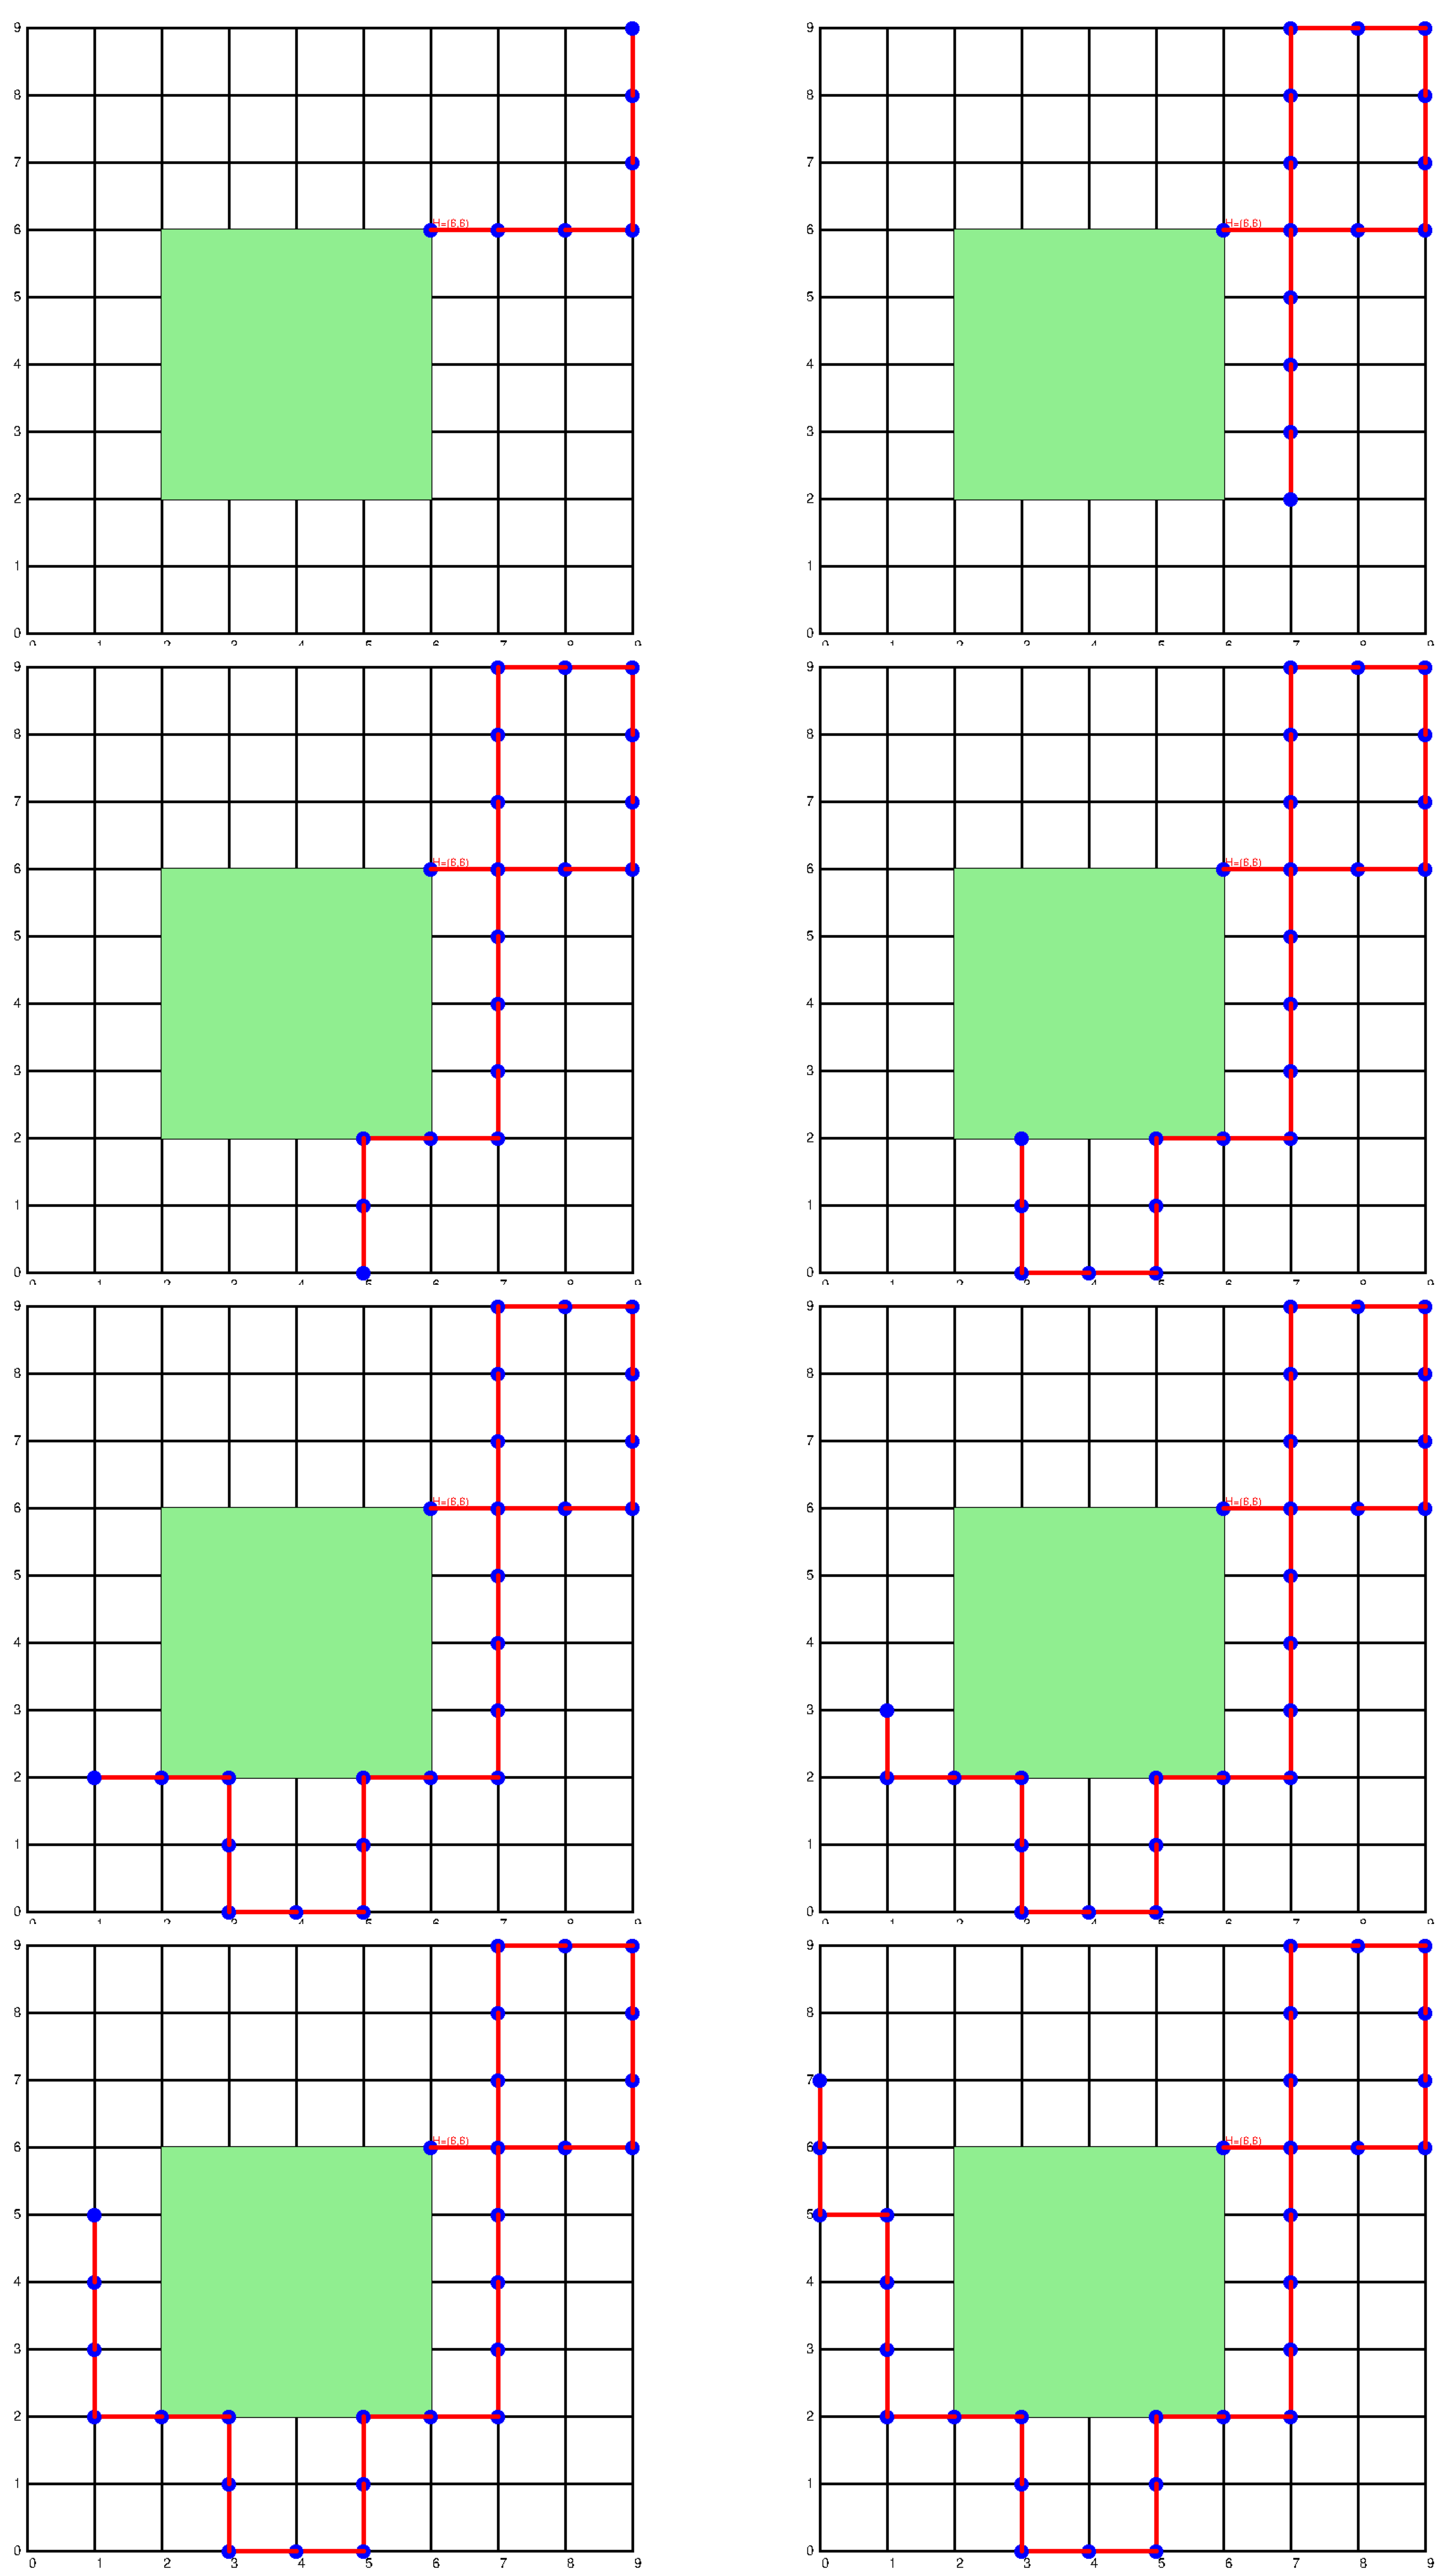

In [23]:
from matplotlib import pyplot as plt

plt.figure(figsize=(25,40),dpi=200)
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.imshow(subplots[i])
    plt.axis('off')
plt.subplots_adjust(bottom=0.001,right=0.999,top=0.999,
left=0.001, hspace=-0.01,wspace=-0.02)
plt.savefig("files/ch16/deliveries.png")

# 16.7 Exercises

In [24]:
# answer to question 16.1
import numpy as np
import random, time
from utils.ch16util import Route

env=Route((7,7), (2,1)) 
state=env.reset() 
env.render()
max_steps=20
# Try a maximum of 20 steps
for step in range(1,max_steps+1):
    # Select a random action
    action=random.choice(env.action_space)
    # Use the selected action to make the move
    new_state,reward,done,info=env.step(action)
    env.render()
    if done or step==max_steps:
        break
    else:
        state = new_state
time.sleep(5)    
env.close()

In [25]:
# answer to question 16.2
import pickle

# Set up hyperparameters
lr=0.6
gamma=0.9
max_exp=0.7
min_exp=0.0
max_steps=1000
episodes=500

# Train the Q-table
Q=np.zeros((91, 4))
env=Route((7,7),(2,1))
for episode in range(episodes):
    update_Q(episode)
    
# Save the Q-table and print it out  
with open('files/ch16/newQs.pickle', 'wb') as fp:
    pickle.dump(Q,fp)
Q=np.round(Q,4)
print(Q) 

In [26]:
# answer to question 16.3
env=Route((7,7),(2,1))
# Load up the new Q-table  
with open('files/ch16/newQs.pickle', 'rb') as fp:
    Q=pickle.load(fp)
env.render()
for _ in range(max_steps):
    action = np.argmax(Q[state,:])
    # Use the selected action to make the move
    new_state, reward, done, info = env.step(action)
    state = new_state
    env.render()
    if done==True:
        break
env.close()

In [27]:
# answer to question 16.4
with open('files/ch16/allQs.pickle', 'rb') as fp:
    Q=pickle.load(fp)
start=(7,7)
end=(2,1)
env=Route(start,end) 
state=env.reset() 
env.render()
while True:
    # Select the action with the highest Q
    action=np.argmax(Q[start[0],start[1],end[0],\
                       end[1],state,:])
    # Use the selected action to make the move
    new_state, reward, done, _ = env.step(action)
    env.render()
    state=new_state
    if done==True:
        break
env.close()